<a href="https://colab.research.google.com/github/min0j98/mobis_aistudy_2023/blob/master/DL_1_INTRODUCTION_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 파이썬 코딩으로 확인하는 선형 회귀

### 1.환경 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

### 2. 데이터 준비

In [2]:
# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 데이터 분포 확인

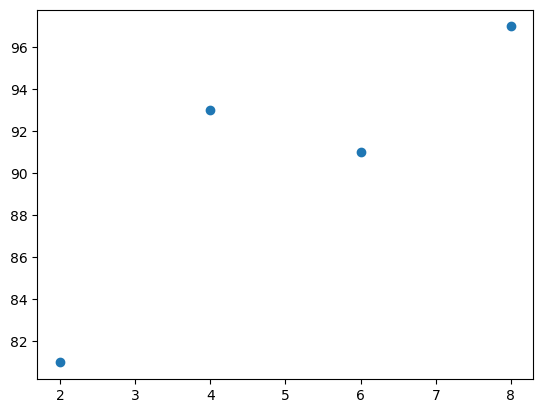

In [3]:
# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [4]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001

### 5. 경사 하강법

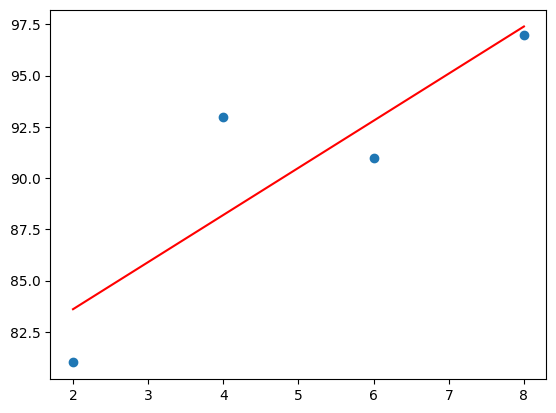

In [5]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        #print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        # 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입하여 그래프를 그립니다.
        y_pred = a * x + b
        # 그래프 출력
        plt.scatter(x, y)
        plt.plot(x, y_pred,'r')
        plt.show()
        display.clear_output(wait=True)

## 2. 모델을 저장해서 점수를 예측하기

### 1. 환경 준비

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [23]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 모델 실행

In [24]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다.
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 295ms/step - loss: 7548.0249
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1943.5474
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 1115.0295
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 988.0150
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 964.0686
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 955.2947
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 948.7831
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 942.6378
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 936.5797
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 930.5679
Epoch 11/2000
1/1 [==============================] - 0s 16ms/step - loss: 924.5960
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 918.6628
Epoch 13/2000
1/1 

### 4. 그래프로 확인

1/1 [==============================] - 0s 94ms/step


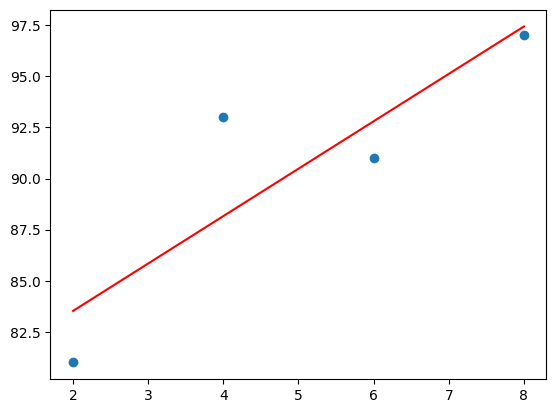

In [25]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

### 5. 모델 테스트

In [26]:
# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))

1/1 [==============================] - 0s 31ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다
